In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import equinox as eqx
import diffrax as dfx
import seaborn as sns

sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

In [3]:
from main import *

In [4]:
def sample_traj(system):
    t0 = 0.0
    t1 = 40.0
    dt = 0.04
    tprev = t0
    tnext = t0 + dt


    solver = dfx.Tsit5()
    term = dfx.ODETerm(system.term)
    (x_init, s_init, e_init) = system.reset()
    obs = jnp.array([jnp.sin(x_init[0][0]), jnp.cos(x_init[0][0]), x_init[0][1],
                     jnp.sin(x_init[0][2]), jnp.cos(x_init[0][2]), x_init[0][3],
                     s_init[0][5], s_init[0][7], e_init[0][0]])
    z_init = system.produce_z(obs)
    y = (x_init[0], z_init, s_init[0], e_init[0])
    args = None
    state = solver.init(term, tprev, tnext, y, args)
    cumulutive_resources = []
    ss=[]
    zs=[]
    while tprev < t1:
        y, _, _, state, _ = solver.step(term, tprev, tnext, y, args, state, made_jump=False)
        tprev = tnext
        tnext = min(t1, tprev+dt)
        cumulutive_resources.append(y[3])
        ss.append(y[2])
        zs.append(y[1])
    return cumulutive_resources,ss,zs

In [5]:
# random agent
system = BigField(seed=14, num_neurons=40, num_obs=9)

self.steepness:  -7.0


In [6]:
cr_random, ss_random, zs_random = sample_traj(system)
ss_0_random = jnp.array(ss_random)[:,0]
ss_1_random = jnp.array(ss_random)[:,1]

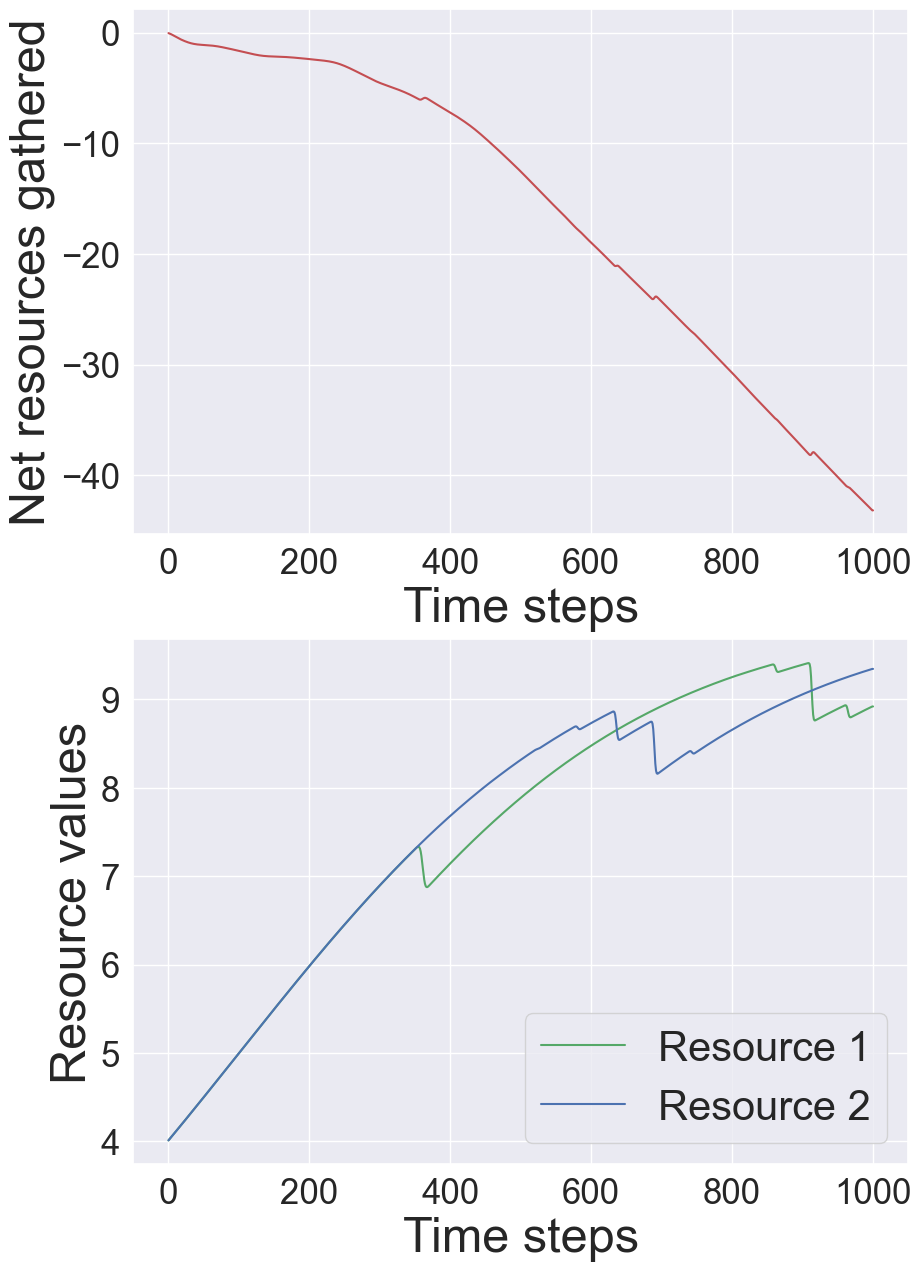

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10, 15))
ax[0].plot(cr_random, c='r')
ax[0].set_xlabel('Time steps', fontsize=35)
ax[0].set_ylabel('Net resources gathered', fontsize=35)
ax[0].tick_params(axis='x', labelsize=25)
ax[0].tick_params(axis='y', labelsize=25)

ax[1].plot(ss_0_random, c='g', label='Resource 1')
ax[1].plot(ss_1_random, c='b', label='Resource 2')
ax[1].set_xlabel('Time steps', fontsize=35)
ax[1].set_ylabel('Resource values', fontsize=35)
ax[1].tick_params(axis='x', labelsize=25)
ax[1].tick_params(axis='y', labelsize=25)
ax[1].legend(fontsize=30)

plt.savefig('random_agent.svg', format='svg', bbox_inches='tight')
plt.show()

In [12]:
learned_system = eqx.tree_deserialise_leaves('./models/epoch_130seed_2val4.1425097126248485.eqx' , system)
cr_learned, ss_learned, zs_learned = sample_traj(learned_system)

In [13]:
ss_0_learned = jnp.array(ss_learned)[:,0]
ss_1_learned = jnp.array(ss_learned)[:,1]

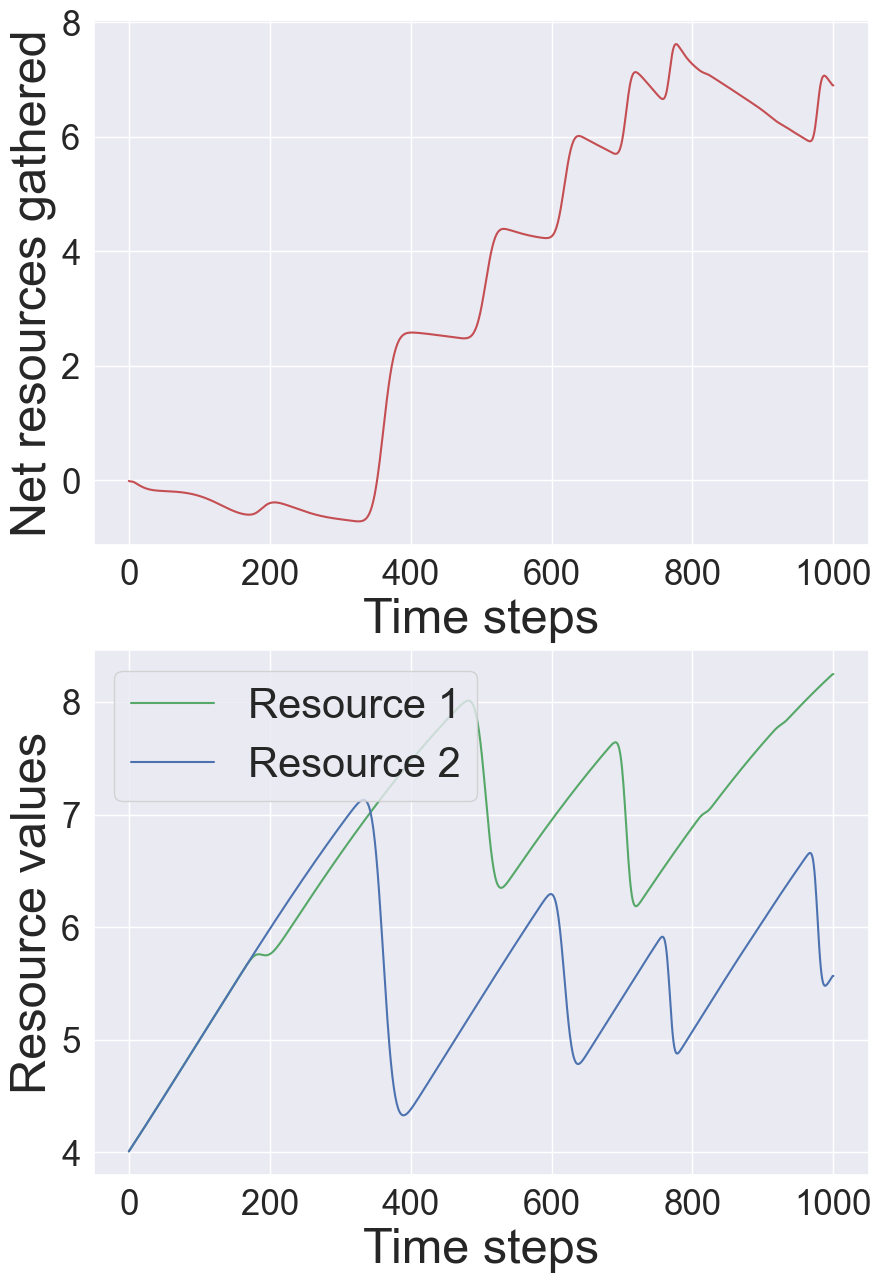

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10, 15))
ax[0].plot(cr_learned, c='r')
ax[0].set_xlabel('Time steps', fontsize=35)
ax[0].set_ylabel('Net resources gathered', fontsize=35)
ax[0].tick_params(axis='x', labelsize=25)
ax[0].tick_params(axis='y', labelsize=25)

ax[1].plot(ss_0_learned, c='g', label='Resource 1')
ax[1].plot(ss_1_learned, c='b', label='Resource 2')
ax[1].set_xlabel('Time steps', fontsize=35)
ax[1].set_ylabel('Resource values', fontsize=35)
ax[1].tick_params(axis='x', labelsize=25)
ax[1].tick_params(axis='y', labelsize=25)
ax[1].legend(fontsize=30, loc='upper left')

plt.savefig('learned_agent_1.svg', format='svg', bbox_inches='tight')
plt.show()

In [13]:
learned_system = eqx.tree_deserialise_leaves('./models/epoch_199seed_2val7.072269742002277.eqx' , system)
cr_learned_2, ss_learned_2, zs_learned_2 = sample_traj(learned_system)

In [14]:
ss_0_learned_2 = jnp.array(ss_learned_2)[:,0]
ss_1_learned_2 = jnp.array(ss_learned_2)[:,1]

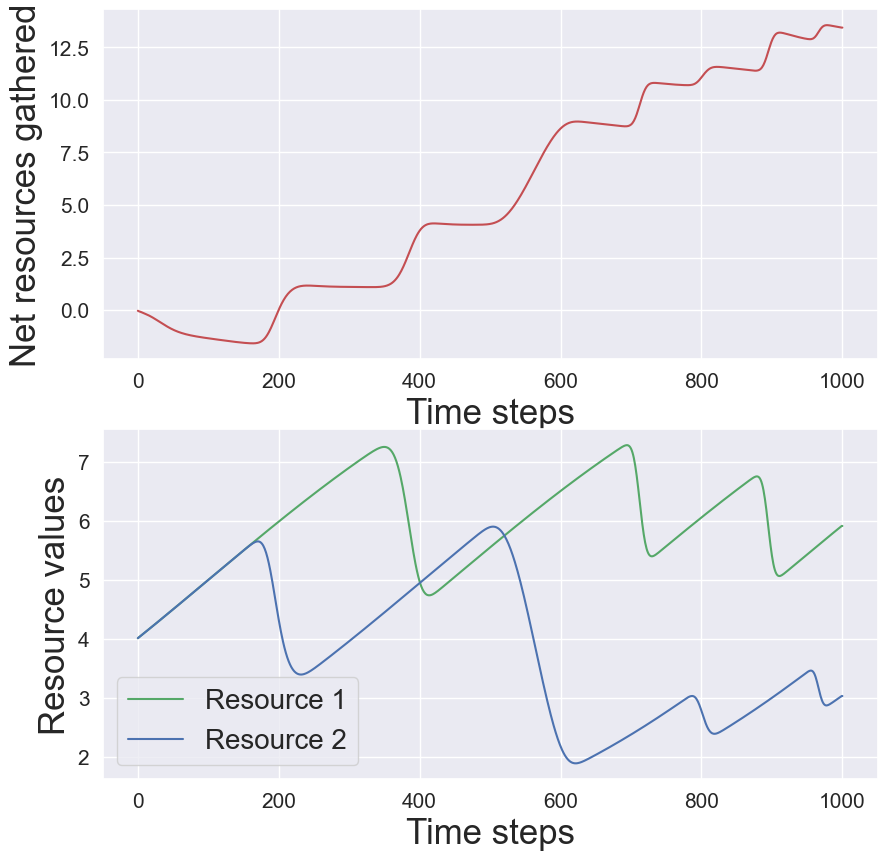

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))
ax[0].plot(cr_learned_2, c='r')
ax[0].set_xlabel('Time steps', fontsize=25)
ax[0].set_ylabel('Net resources gathered', fontsize=25)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

ax[1].plot(ss_0_learned_2, c='g', label='Resource 1')
ax[1].plot(ss_1_learned_2, c='b', label='Resource 2')
ax[1].set_xlabel('Time steps', fontsize=25)
ax[1].set_ylabel('Resource values', fontsize=25)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].legend(fontsize=20)

plt.savefig('learned_agent_2.svg', format='svg', bbox_inches='tight')
plt.show()

In [16]:
learned_system = eqx.tree_deserialise_leaves('./models/epoch_1814seed_2val10.393508191545337.eqx' , system)
cr_learned_3, ss_learned_3, zs_learned_3 = sample_traj(learned_system)

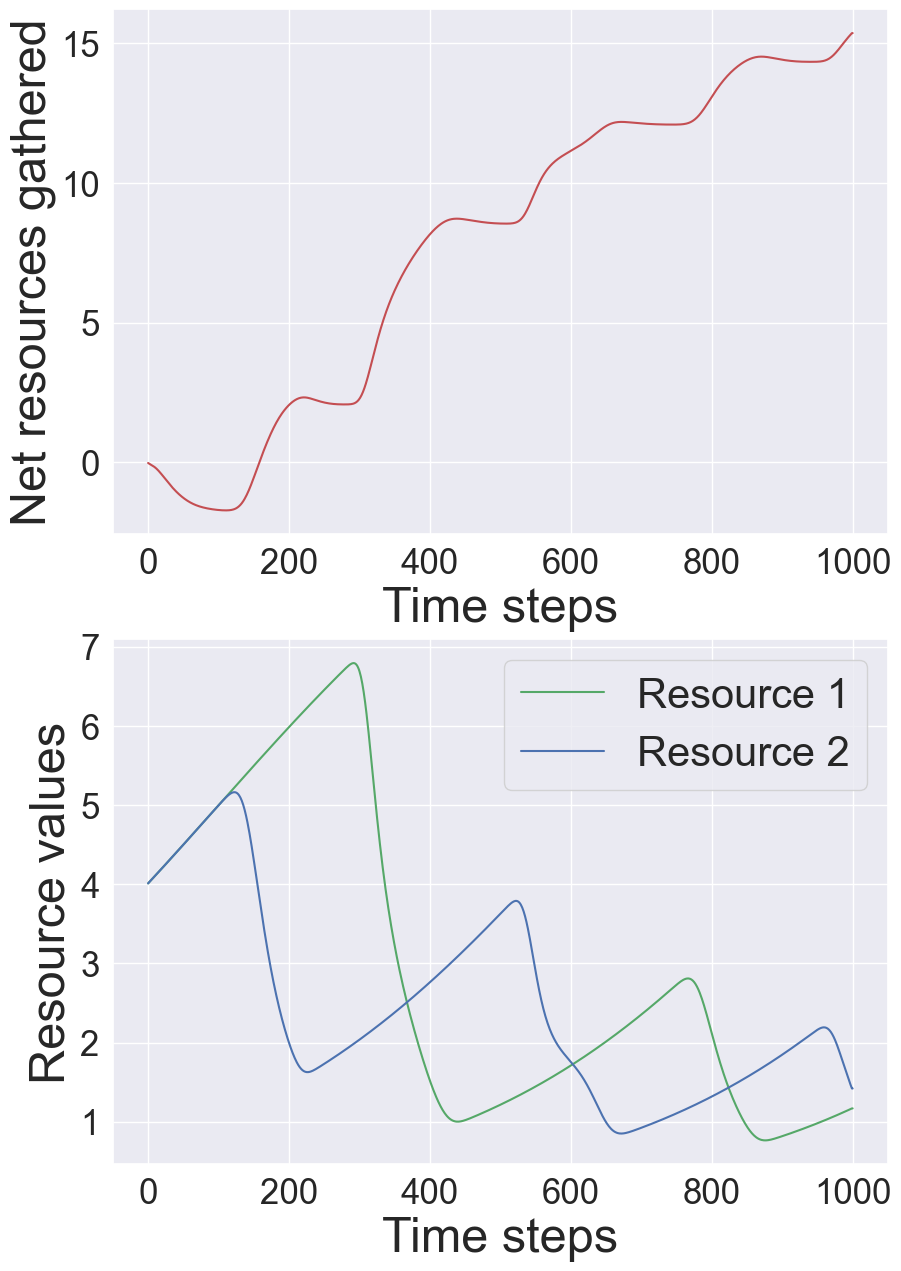

In [21]:
ss_0_learned_3 = jnp.array(ss_learned_3)[:,0]
ss_1_learned_3 = jnp.array(ss_learned_3)[:,1]

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10, 15))
ax[0].plot(cr_learned_3, c='r')
ax[0].set_xlabel('Time steps', fontsize=35)
ax[0].set_ylabel('Net resources gathered', fontsize=35)
ax[0].tick_params(axis='x', labelsize=25)
ax[0].tick_params(axis='y', labelsize=25)

ax[1].plot(ss_0_learned_3, c='g', label='Resource 1')
ax[1].plot(ss_1_learned_3, c='b', label='Resource 2')
ax[1].set_xlabel('Time steps', fontsize=35)
ax[1].set_ylabel('Resource values', fontsize=35)
ax[1].tick_params(axis='x', labelsize=25)
ax[1].tick_params(axis='y', labelsize=25)
ax[1].legend(fontsize=30 , loc='upper right')

plt.savefig('learned_agent_3.svg', format='svg', bbox_inches='tight')
plt.show()